In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from ipynb.fs.full.utils import *
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

In [2]:
Mean_FPPs_Activity = mean_FPPs_movie_data()

In [3]:
Mean_FPPs_Activity.shape

(5, 3655)

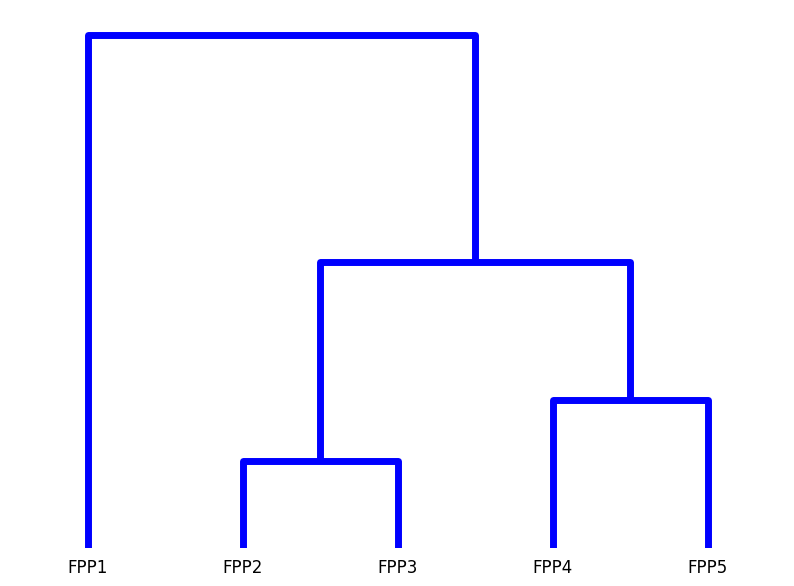

In [11]:
correlation_matrix = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        correlation_matrix[i, j], _ = pearsonr(Mean_FPPs_Activity[i], Mean_FPPs_Activity[j])
        


distance_matrix = 1 - correlation_matrix
condensed_distance_matrix = squareform(distance_matrix, checks=False)

links = hierarchy.linkage(condensed_distance_matrix, method='average')



# Plot the dendrogram
plt.figure(figsize=(10, 7))
labels = ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5']
def color_func(x):
    return 'blue'
    

with plt.rc_context({'lines.linewidth': 5}):
    pden = hierarchy.dendrogram(links, 
                                # no_labels=True,  
                                labels = labels,
                                color_threshold=1.5,
                                link_color_func=color_func)

# for label in plt.gca().get_xticklabels():
#     label.set_fontname('Arial')

# plt.title('Hierarchical clustering dendrogram')
# plt.xlabel('FPP')
# plt.ylabel('Distance')

plt.gca().axes.get_yaxis().set_visible(False)
plt.box(False)

# plt.savefig('E:/FPP_files_and_codes/Figures/Figure4_files/Row1/Hierarchical_clustering_dendrogram.png', dpi=600, bbox_inches='tight')
plt.show()